## User Experience Course
### Sidorenko Elena, 2102513

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv', sep = ',')

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                98913 non-null  int64  
 1   identifierHash       98913 non-null  int64  
 2   type                 98913 non-null  object 
 3   country              98913 non-null  object 
 4   language             98913 non-null  object 
 5   socialNbFollowers    98913 non-null  int64  
 6   socialNbFollows      98913 non-null  int64  
 7   socialProductsLiked  98913 non-null  int64  
 8   productsListed       98913 non-null  int64  
 9   productsSold         98913 non-null  int64  
 10  productsPassRate     98913 non-null  float64
 11  productsWished       98913 non-null  int64  
 12  productsBought       98913 non-null  int64  
 13  gender               98913 non-null  object 
 14  civilityGenderId     98913 non-null  int64  
 15  civilityTitle        98913 non-null 

In [5]:
# checking columns to clean up
unique_values = df.nunique()
unique_values

index                  98913
identifierHash         98913
type                       1
country                  200
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      420
productsListed            65
productsSold              75
productsPassRate          72
productsWished           279
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       700
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              199
dtype: int64

In [6]:
# there are only 195 countries in the world. There must be typos in the dataset.
unique_countries = df['country'].unique()
unique_countries

array(['Etats-Unis', 'Allemagne', 'Suède', 'Turquie', 'France',
       'Royaume-Uni', 'Italie', 'Espagne', 'Danemark', 'Réunion',
       'Suisse', 'Chili', 'Djibouti', 'Congo', 'Irlande', 'Canada',
       'Martinique', 'Sénégal', 'Australie', 'Belgique', 'Pays-Bas',
       'Chine', 'Maroc', 'Panama', 'Portugal', 'Équateur', 'Singapour',
       'Hong Kong', 'Brésil', 'Japon', 'Colombie', 'Nouvelle Zélande',
       'Kowait', 'Pologne', 'Corée du Sud', 'Bulgarie', 'Inde',
       'Trinidad et Tobago', 'Rwanda', 'Émirats arabes unis', 'Mexique',
       'Brunei Darussalam', 'Le Salvador', 'République dominicaine',
       'Thailande', 'Argentine', 'Algérie', 'Finlande', 'Grèce', 'Qatar',
       'Pakistan', 'Malaisie', 'Viet Nam', 'Russie', 'Tunisie',
       'Azerbaïdjan', 'Mali', 'Autriche', 'Niger', 'Mongolie', 'Hongrie',
       'Lettonie', 'Croatie', 'Serbie', 'Malte', 'Roumanie', 'Liban',
       'Luxembourg', 'Albanie', 'Angola', 'Egypte', 'Guadeloupe',
       'Cameroun', 'Indonésie', 'Slo

In [52]:
# The countries listed above are in French.
# Create a list of 195 countries in French from ChatGPT.
countries_chatGPT = ['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola', 
'Antigua-et-Barbuda', 'Arabie Saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin', 'Bhoutan', 'Bolivie', 
'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunei', 'Bulgarie', 'Burkina Faso', 'Burundi', 'Cambodge', 
'Cameroun', 'Canada', 'Cap-Vert', 'République Centrafricaine', 'Chili', 'Chine', 'Chypre', 'Colombie', 'Comores', 
'Congo', 'République Démocratique du Congo', 'Corée du Nord', 'Corée du Sud', 'Costa Rica', 'Côte d’Ivoire', 
'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'République Dominicaine', 'Égypte', 'Émirats Arabes Unis',
'Équateur', 'Érythrée', 'Espagne', 'Estonie', 'États-Unis', 'Éthiopie', 'Fidji', 'Finlande', 'France', 'Gabon', 
'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guinée équatoriale', 
'Guyana', 'Haïti', 'Honduras', 'Hongrie', 'Îles Marshall', 'Inde', 'Indonésie', 'Iran', 'Irak', 'Irlande', 
'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 
'Koweït', 'Laos', 'Lesotho', 'Lettonie', 'Liban', 'Liberia', 'Libye', 'Liechtenstein', 'Lituanie', 'Luxembourg', 
'Macédoine', 'Madagascar', 'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Îles Salomon', 'Maroc', 'Maurice', 
'Mauritanie', 'Mexique', 'Micronésie', 'Moldavie', 'Monaco', 'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar', 
'Namibie', 'Nauru', 'Népal', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norvège', 'Nouvelle-Zélande', 'Oman', 
'Ouganda', 'Ouzbékistan', 'Pakistan', 'Palaos', 'Palestine', 'Panama', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 
'Pays-Bas', 'Pérou', 'Philippines', 'Pologne','Portugal', 'Qatar', 'Roumanie', 'Royaume-Uni', 'Russie', 'Rwanda', 
'Saint-Christophe-et-Niévès', 'Sainte-Lucie', 'Saint-Marin', 'Saint-Vincent-et-les Grenadines', 'Îles Samoa', 
'Sao Tomé-et-Principe', 'Sénégal', 'Serbie', 'Seychelles', 'Sierra Leone', 'Singapour', 'Slovaquie', 'Slovénie',
'Somalie', 'Soudan', 'Soudan du Sud', 'Sri Lanka', 'Suède', 'Suisse', 'Suriname', 'Swaziland', 'Syrie', 
'Tadjikistan', 'Tanzanie', 'Tchad', 'République Tchèque', 'Thaïlande', 'Timor oriental', 'Togo', 'Tonga', 
'Trinité-et-Tobago', 'Tunisie', 'Turkménistan', 'Turquie', 'Tuvalu', 'Ukraine', 'Uruguay', 'Vanuatu', 'Vatican',
'Venezuela', 'Viêt Nam', 'Yémen', 'Zambie', 'Zimbabwe']

# Checking how many countries there are in the new list
len(countries_chatGPT)

195

In [53]:
# Add column that checks if the country is real
df['isRealCountry'] = df['country'].isin(countries_chatGPT)
df.value_counts('isRealCountry')

isRealCountry
True     76304
False    22609
dtype: int64

In [54]:
# Drop columns that are False
df = df.drop(df[df['isRealCountry'] == False].index)
df.value_counts('isRealCountry')

isRealCountry
True    76304
dtype: int64

In [55]:
# Column 'type' has only 1 unique value, therefore can be dropped. Other columns are also not relevant 
# and can be dropped
df = df.drop('type', axis=1)
df = df.drop('index', axis=1)
df = df.drop('identifierHash', axis=1)
df = df.drop('civilityGenderId', axis=1)
df = df.drop('isRealCountry', axis=1)
df = df.drop('countryCode', axis=1)

In [56]:
# Convert boolean values to numerical. 0 = False, 1 = True
df['hasAnyApp'] = df['hasAnyApp'].astype(int)
df['hasAndroidApp'] = df['hasAndroidApp'].astype(int)
df['hasIosApp'] = df['hasIosApp'].astype(int)
df['hasProfilePicture'] = df['hasProfilePicture'].astype(int)

In [57]:
# Save the cleaned dataset to a new file:
df.to_csv('cleanedData.csv', index=False)

## Data Exploration

In [58]:
df_clean = pd.read_csv('cleanedData.csv', sep = ',')

In [59]:
df_clean.columns

Index(['country', 'language', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought', 'gender',
       'civilityTitle', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp',
       'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'seniorityAsMonths', 'seniorityAsYears'],
      dtype='object')

In [15]:
df_clean.describe

<bound method NDFrame.describe of            country language  socialNbFollowers  socialNbFollows  \
0        Allemagne       de                  3                8   
1            Suède       en                  3                8   
2          Turquie       en                  3                8   
3           France       en                  3                8   
4      Royaume-Uni       en                  3                8   
...            ...      ...                ...              ...   
76299      Irlande       en                  3                8   
76300       France       fr                  3                8   
76301     Belgique       en                  3                8   
76302       Italie       it                  3                8   
76303       Guinée       fr                  3                8   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
0                        0               0             0               0.0   
1    

In [16]:
df_clean.head(1)

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
0,Allemagne,de,3,8,0,0,0,0.0,0,0,F,mrs,0,0,0,1,709,3205,106.83,8.9


In [60]:
# Get the averages of in-platform interaction
print("Average followers: {:.2f}. Average follows: {:.2f}".format(df_clean['socialNbFollowers'].mean(), df_clean['socialNbFollows'].mean()))
print("Average products liked: {:.2f}".format(df_clean['socialProductsLiked'].mean()),". Average products listed: {:.2f}".format(df_clean['productsListed'].mean()),". Average products sold: {:.2f}".format(df_clean['productsSold'].mean()))
print("Average products pass rate: {:.2f}".format(df_clean['productsPassRate'].mean()),". Average products wished: {:.2f}".format(df_clean['productsWished'].mean()),". Average products bought: {:.2f}".format(df_clean['productsBought'].mean()))

Average followers: 3.47. Average follows: 8.52
Average products liked: 4.86 . Average products listed: 0.11 . Average products sold: 0.14
Average products pass rate: 0.97 . Average products wished: 1.76 . Average products bought: 0.19


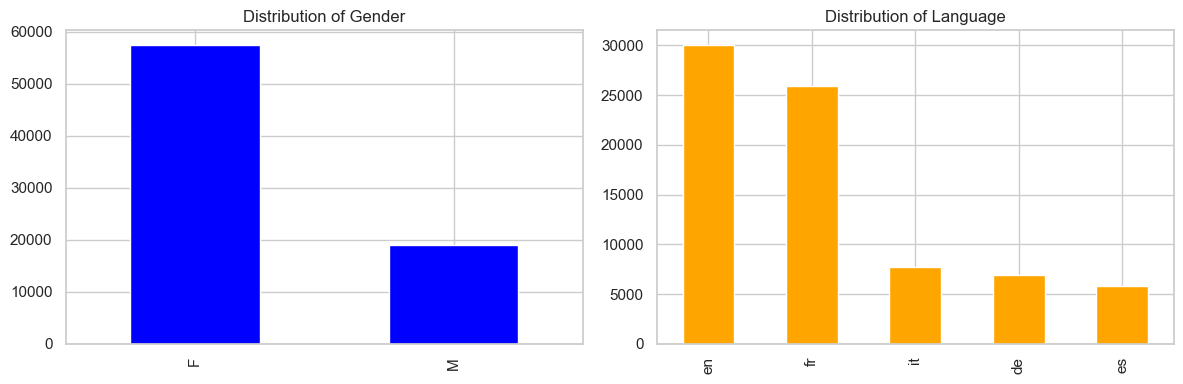

In [70]:
# Vizualize gender and language distribution
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

df_clean['gender'].value_counts().plot(kind='bar', ax=axs[0], color ='blue')
axs[0].set_title('Distribution of Gender')

df_clean['language'].value_counts().plot(kind='bar', ax=axs[1],color ='orange')
axs[1].set_title('Distribution of Language')

plt.tight_layout()
plt.show()


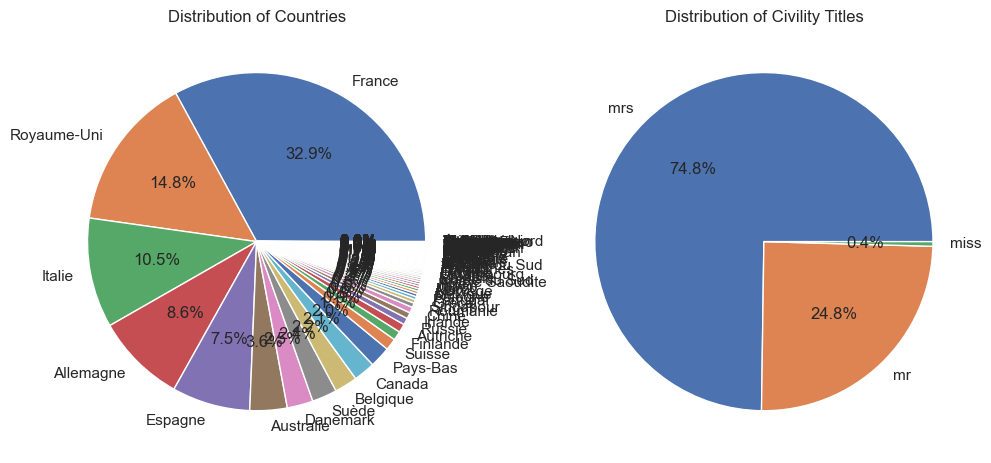

In [71]:
# Visualize geographical distribution of ß´users
# Get the count of each country in the 'country' column of the dataframe. Same for civility title
country_counts = df_clean['country'].value_counts()
civTitle_counts = df_clean['civilityTitle'].value_counts()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for the country counts in the first subplot
ax1.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Countries')

# Create a pie chart for the civility title counts in the second subplot
ax2.pie(civTitle_counts.values, labels=civTitle_counts.index, autopct='%1.1f%%')
ax2.set_title('Distribution of Civility Titles')

# Display the figure
plt.show()

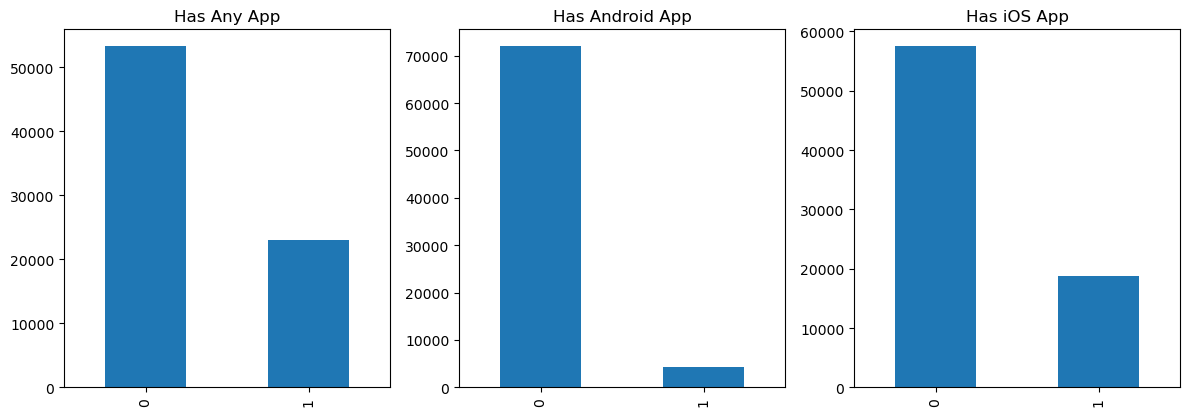

In [19]:
# Visualize mobile app distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['hasAnyApp'].value_counts().plot(kind='bar')
plt.title('Has Any App')

plt.subplot(2, 3, 2)
df['hasAndroidApp'].value_counts().plot(kind='bar')
plt.title('Has Android App')

plt.subplot(2, 3, 3)
df['hasIosApp'].value_counts().plot(kind='bar')
plt.title('Has iOS App')

plt.tight_layout()
plt.show()

/var/folders/f2/51x8sc3d7yqctdsgf4tqr6c80000gn/T/ipykernel_26203/1762016075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


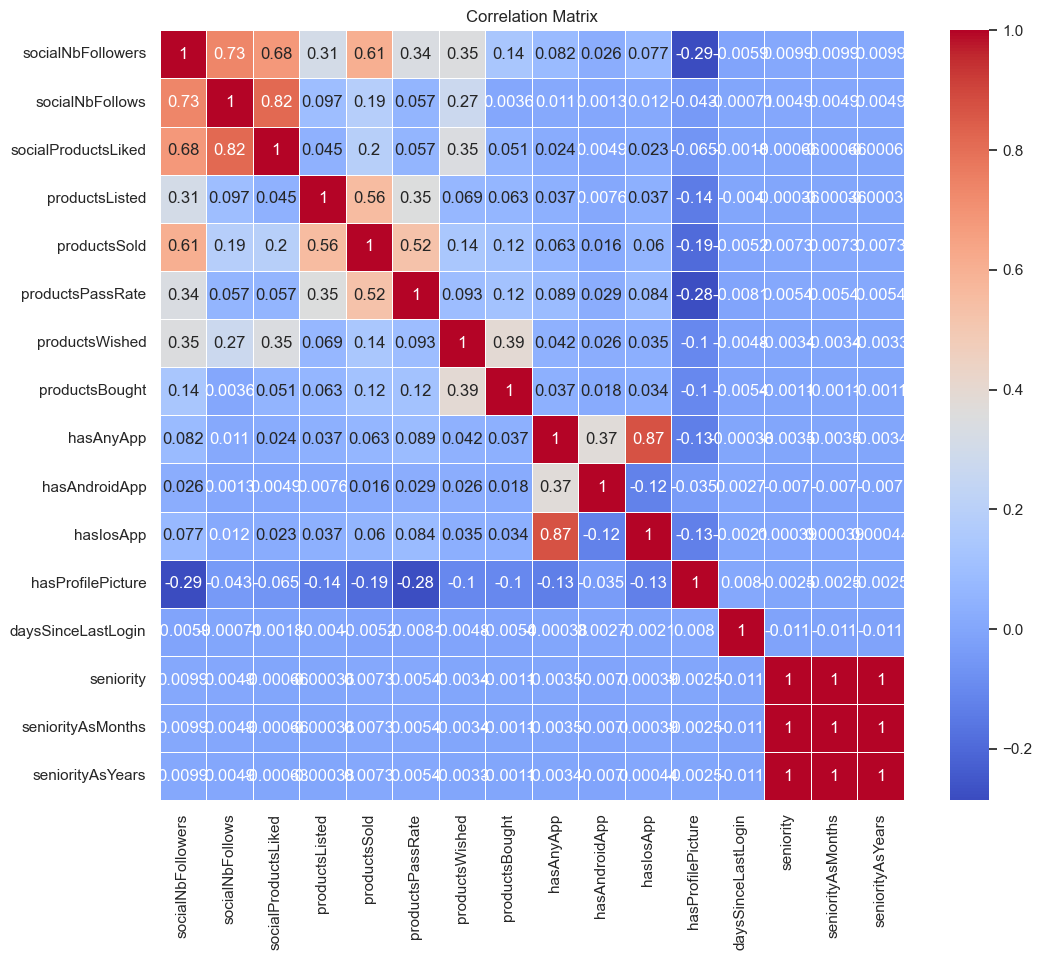

In [20]:
# Create a correlation matrix to see what relationships there are
corr_matrix = df_clean.corr()

# Create a heatmap visualization of the correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Principal Component Analysis

In [72]:
from sklearn.preprocessing import StandardScaler

In [81]:
# standardizin your dataset since the variables are measured in different units but
# will be intergrated into a few components (hence variables need to be comparable)
scaler = StandardScaler()
df2 = df_clean.select_dtypes(include=[int, float, bool])

scaler.fit(df2)

scaled_data = scaler.transform(df2)

In [82]:
# Run the PCA
from sklearn.decomposition import PCA

In [83]:
# Specify the number of components
pca = PCA(n_components = 3)
pca.fit(scaled_data)

# Transform the data to its first 3 principal components 
x_pca = pca.transform(scaled_data)

scaled_data.shape
x_pca.shape

(76304, 3)

### Interpreting the Components

<Axes: >

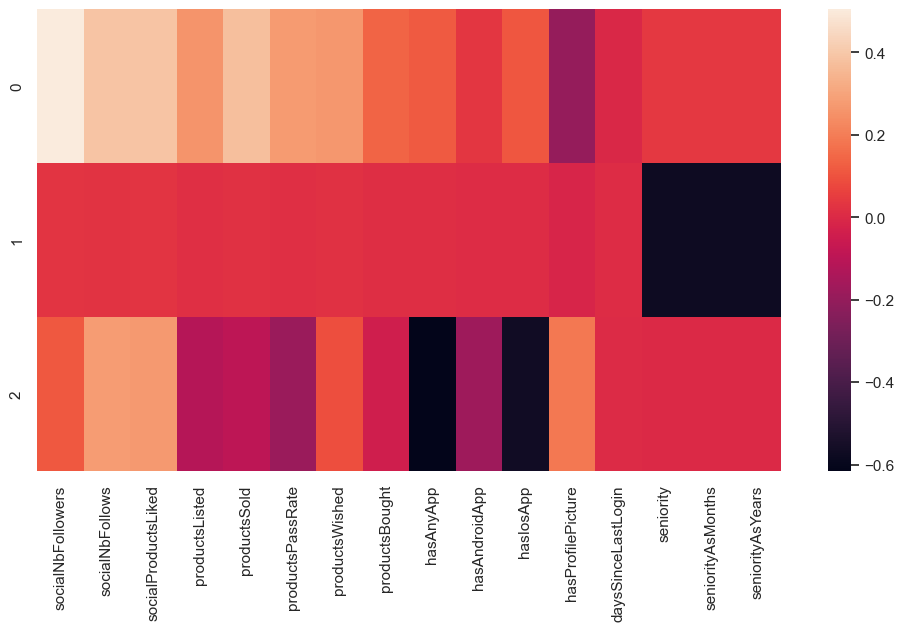

In [80]:
# The heatmap and color bars represent the correlation between the variables and each component
pca_comp = pca.components_
df_comp = pd.DataFrame(pca.components_, columns = df2.columns)

plt.figure(figsize = (12,6))
sns.heatmap(df_comp)

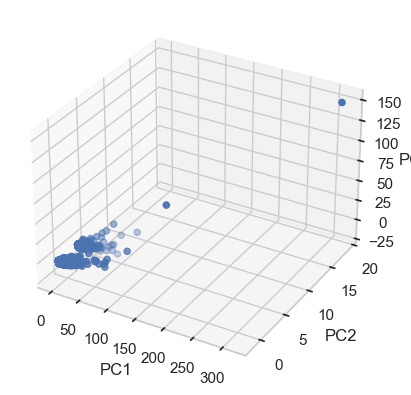

In [84]:
# Specify the number of components
pca = PCA(n_components = 3)
pca.fit(scaled_data)

# Transform the data to its first 3 principal components 
x_pca = pca.transform(scaled_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

##   Hierarchical Clustering 

## Kmeans clustering using elbow method

In [33]:
from sklearn.cluster import KMeans

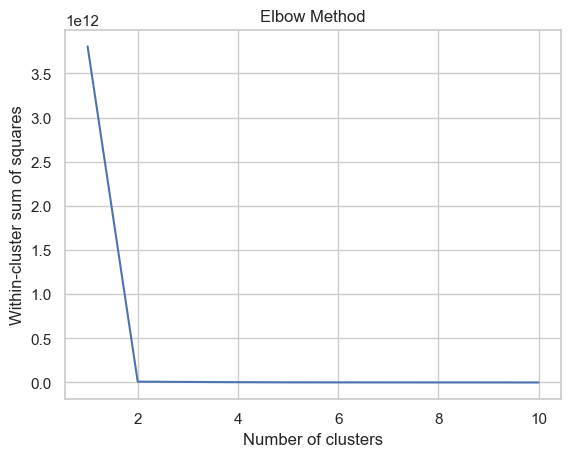

In [34]:
# evaluating how many clusters are best

# Initialize empty list to store within-cluster sum of squares
wss = []

# Fit KMeans algorithm to data for a range of cluster values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wss.append(kmeans.inertia_)

# Plot elbow curve
sns.set(style='whitegrid')
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [95]:
# We can assume that there are 2 clusters. But after running K-Means with 2 clusters, 
# there were only 7 observations in the second cluster. Therefore the number of clusters increased to 3
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to your data
kmeans.fit(df2) 

# Get the cluster assignments for each data point:
cluster_assignments = kmeans.predict(df2)

# Add the cluster assignments to your original data frame:
df['Cluster'] = cluster_assignments

# Save the updated data frame to a new file:
df.to_csv('users_clusters.csv', index=False)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
df.value_counts('Cluster')

Cluster
2    60237
0    16060
1        7
dtype: int64

### Visualise K-Means Clusters

TypeError: scatter() got multiple values for argument 's'

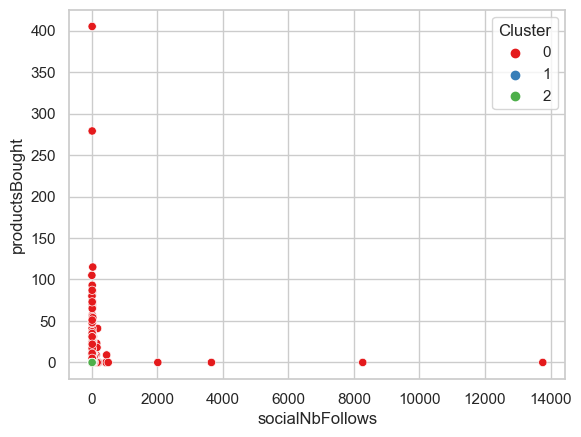

In [101]:
# Plot the data points with different colors for each cluster
sns.scatterplot(x='socialNbFollows', y='productsBought', hue='Cluster', data=df, palette='Set1')

# Add the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='black')

# Set the title and labels for the plot
plt.title('Clusters')
plt.xlabel('socialNbFollows')
plt.ylabel('productsBought')

# Show the plot
plt.show()


/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


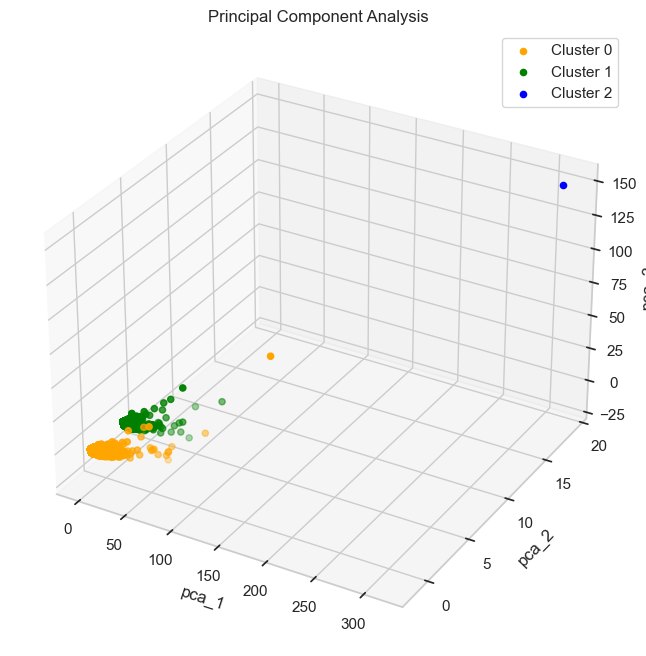

In [100]:
pred_y = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=3)
pca_df = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_df, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df['cluster'] = pred_y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,  projection='3d')
colors = ['orange', 'green', 'blue']
for i in range(3):
    cluster = pca_df[pca_df['cluster'] == i]
    ax.scatter(cluster['pca_1'], cluster['pca_2'], cluster['pca_3'], c=colors[i], label=f'Cluster {i}')
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
ax.legend()
ax.set_title('Principal Component Analysis')
plt.show()

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: list index out of range

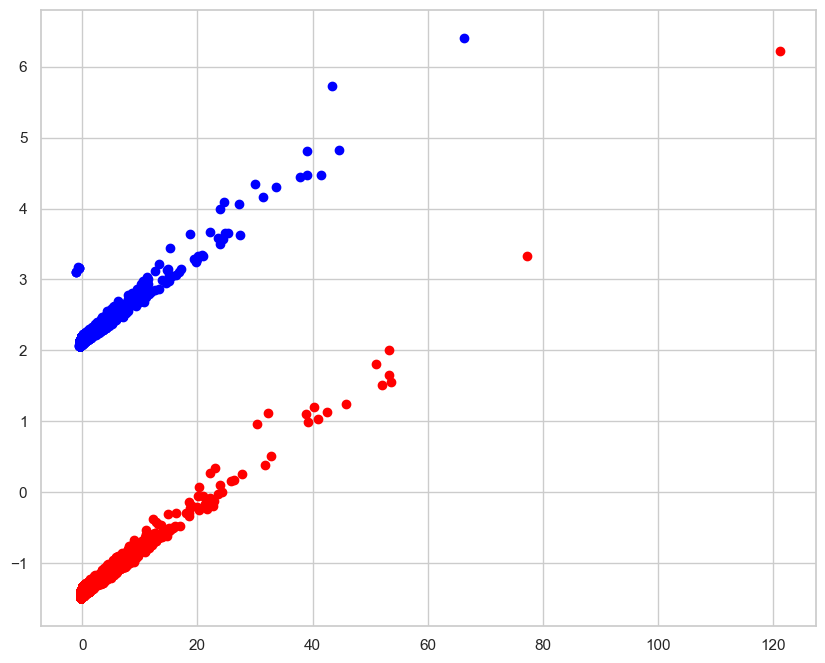

In [102]:
pred_y = kmeans.fit_predict(scaled_data)


pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_df, columns=['pca_1', 'pca_2'])
pca_df['cluster'] = pred_y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
colors = ['red', 'blue']
for i in range(3):
    cluster = pca_df[pca_df['cluster'] == i]
    ax.scatter(cluster['pca_1'], cluster['pca_2'], c=colors[i], label=f'Cluster {i}')
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.legend()
plt.show()


## K-Prototype

In [45]:
!pip install kmodes

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76304 entries, 0 to 76303
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              76304 non-null  object 
 1   language             76304 non-null  object 
 2   socialNbFollowers    76304 non-null  int64  
 3   socialNbFollows      76304 non-null  int64  
 4   socialProductsLiked  76304 non-null  int64  
 5   productsListed       76304 non-null  int64  
 6   productsSold         76304 non-null  int64  
 7   productsPassRate     76304 non-null  float64
 8   productsWished       76304 non-null  int64  
 9   productsBought       76304 non-null  int64  
 10  gender               76304 non-null  object 
 11  civilityTitle        76304 non-null  object 
 12  hasAnyApp            76304 non-null  int64  
 13  hasAndroidApp        76304 non-null  int64  
 14  hasIosApp            76304 non-null  int64  
 15  hasProfilePicture    76304 non-null 

In [47]:
from kmodes.kprototypes import KPrototypes

# Select numerical and categorical columns
num_cols = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
            'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'hasAnyApp',
            'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
            'seniorityAsMonths', 'seniorityAsYears']
cat_cols = ['country', 'language', 'gender', 'civilityTitle']

# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean[num_cols])

# Combine numerical and PCA components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)
data_combined = np.concatenate((data_scaled, pca_components), axis=1)

# Apply k-prototypes
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(data_combined, categorical=[3,4,5,6])

# Print cluster centroids
print(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 27783, ncost: 807980.0797899769
Run: 1, iteration: 2/100, moves: 609, ncost: 805390.5060689218
Run: 1, iteration: 3/100, moves: 25, ncost: 805385.586056439
Run: 1, iteration: 4/100, moves: 2, ncost: 805385.5278168643
Run: 1, iteration: 5/100, moves: 0, ncost: 805385.5278168643
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1976, ncost: 736250.3877073161
Run: 2, iteration: 2/100, moves: 164, ncost: 735757.2493709126
Run: 2, iteration: 3/100, moves: 13, ncost: 735751.0227717954
Run: 2, iteration: 4/100, moves: 1, ncost: 735750.9824179973
Run: 2, iteration: 5/100, moves: 0, ncost: 735750.9824179973
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 

In [108]:
df_clean['cluster']= clusters

<Axes: xlabel='x', ylabel='y'>

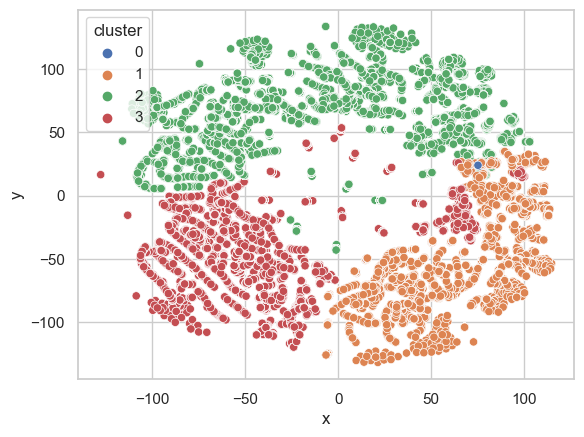

In [48]:
# Visualize clusters
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_combined)

# Create a DataFrame with the reduced data and cluster labels
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_tsne['cluster'] = clusters

# Plot the clusters
sns.scatterplot(data=df_tsne, x='x', y='y', hue='cluster', palette='deep')

In [104]:
# How many observations are in each cluster
df_tsne.value_counts('cluster')

cluster
3    31891
2    30404
1    13990
0       19
dtype: int64

In [110]:
# split cleaned dataset to 4 sub-sets, one for each cluster
cluster0 = df_clean[df_clean['cluster'] == 0]
cluster1 = df_clean[df_clean['cluster'] == 1]
cluster2 = df_clean[df_clean['cluster'] == 2]
cluster3 = df_clean[df_clean['cluster'] == 3]

/var/folders/f2/51x8sc3d7yqctdsgf4tqr6c80000gn/T/ipykernel_26203/748509190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_0 = cluster0.corr()


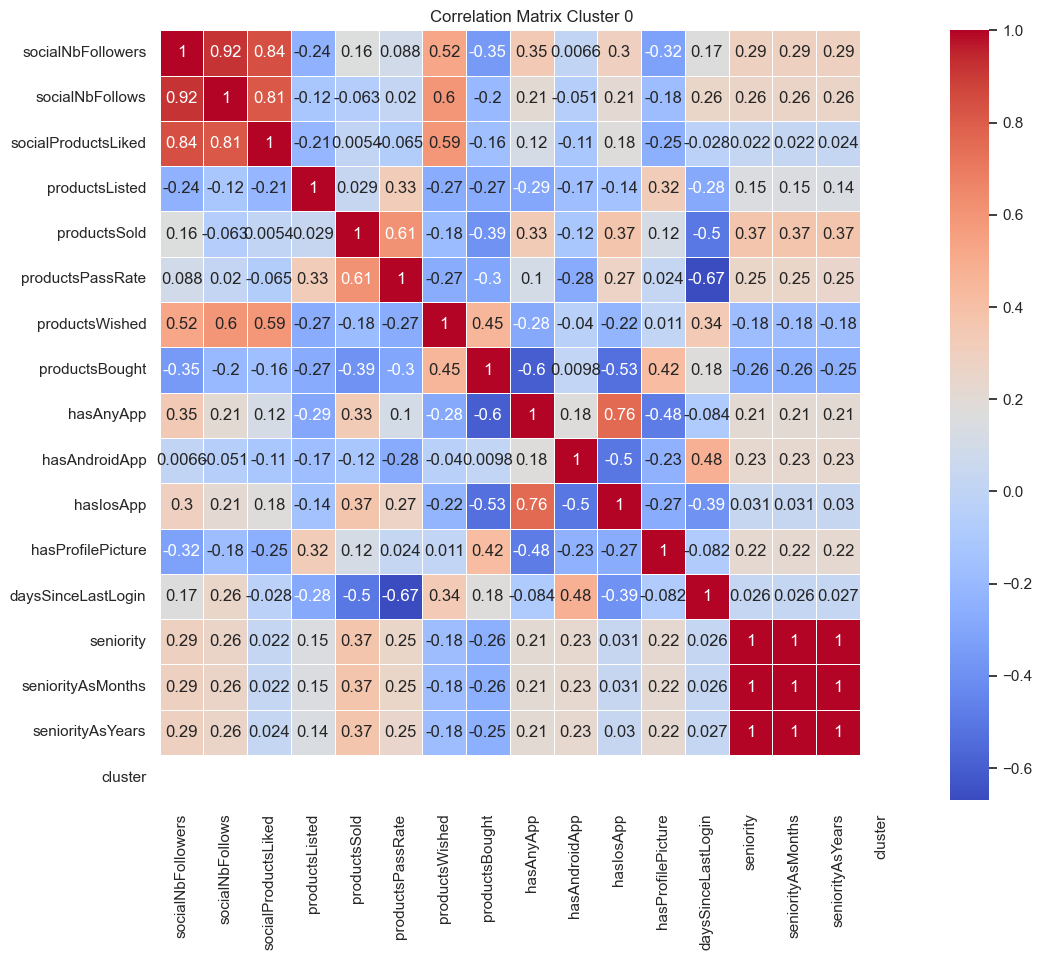

In [118]:
# create correlation matrix for each cluster to see who those users are
corr_matrix_0 = cluster0.corr()

# Create a heatmap visualization of the correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_0, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Cluster 0')
plt.show()

/var/folders/f2/51x8sc3d7yqctdsgf4tqr6c80000gn/T/ipykernel_26203/966934393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_1 = cluster1.corr()


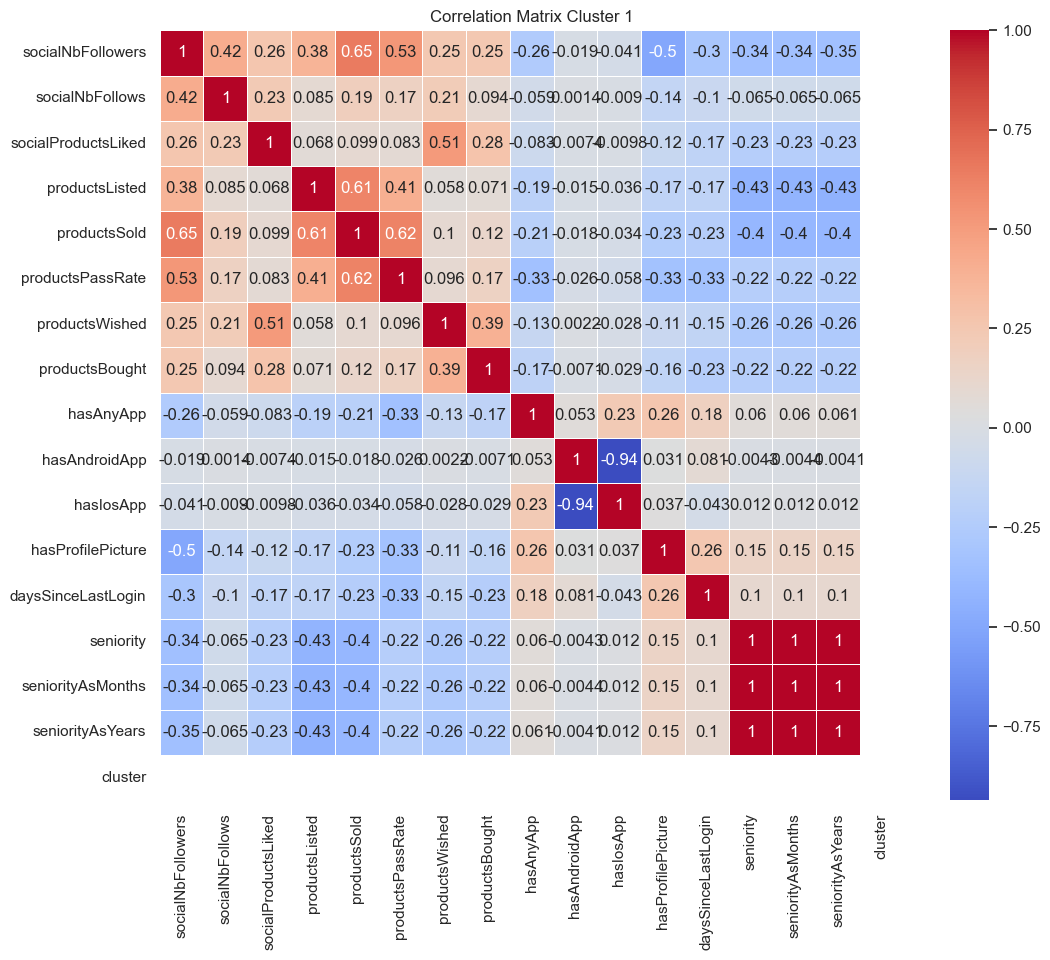

In [119]:
corr_matrix_1 = cluster1.corr()

# Create a heatmap visualization of the correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Cluster 1')
plt.show()

/var/folders/f2/51x8sc3d7yqctdsgf4tqr6c80000gn/T/ipykernel_26203/119746851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_2 = cluster2.corr()


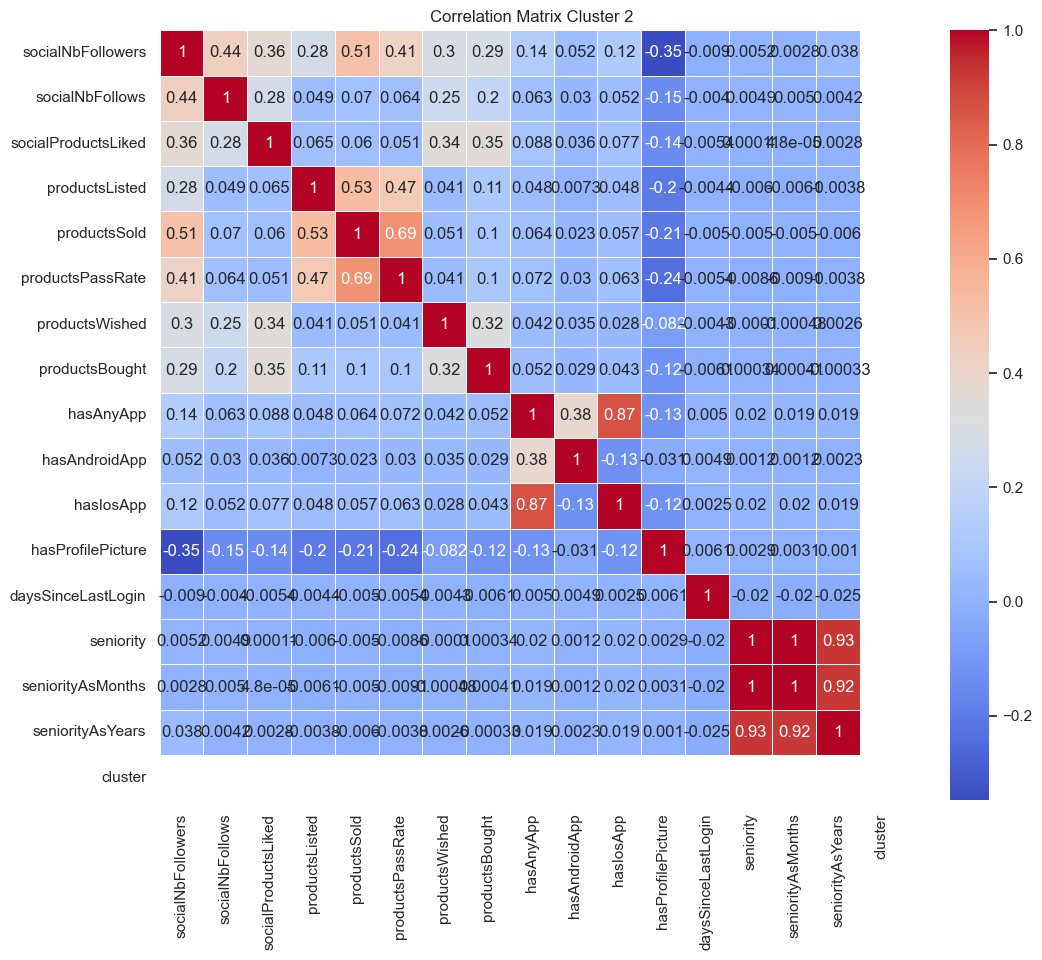

In [120]:
corr_matrix_2 = cluster2.corr()

# Create a heatmap visualization of the correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Cluster 2')
plt.show()

/var/folders/f2/51x8sc3d7yqctdsgf4tqr6c80000gn/T/ipykernel_26203/1977019202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_3 = cluster3.corr()


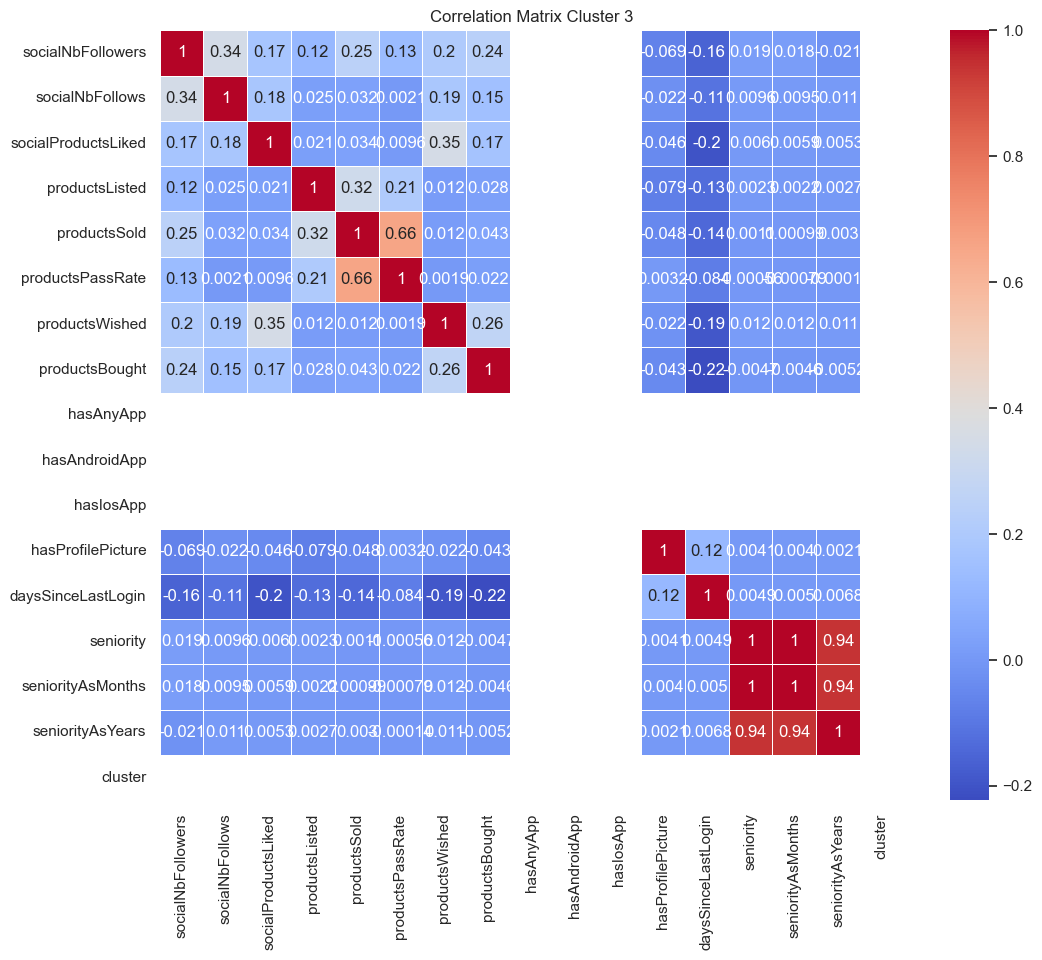

In [121]:
corr_matrix_3 = cluster3.corr()

# Create a heatmap visualization of the correlation matrix
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_3, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Cluster 3')
plt.show()